In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import sys
import os 

#Completely optional, this helps time different parts of the code 
sys.path.append(r'C:\Users\holsg\Documents\Python\Script Uni\Homework\Level 2 - Copy\Section 2.1\2.1.1 to 2.1.5')

from timer_class import Timer

In [4]:
# Define the full path to the CSV file


#Update this path for the file: fix_sector_add_marketcap
csv_file = r'C:\Users\holsg\Documents\Python\UBCTG\Michael\fix_sector_add_marketcap.csv'

t = Timer()

t.start()

# Read the CSV file
df = pd.read_csv(csv_file)
#Drop this column now; it is wrong and needs to be fixed anyways 
df = df.drop(columns=['sector'])

t.end()

df

Starting timer.
Ending timer.
Total elapsed time: 2.344820499420166 seconds



,Date,Permno,Ticker,Returns
0,2018-01-02,10026,JJSF,-0.017454
1,2018-01-03,10026,JJSF,-0.009988
2,2018-01-04,10026,JJSF,0.013813
3,2018-01-05,10026,JJSF,-0.009551
4,2018-01-08,10026,JJSF,0.000742
...,...,...,...,...
5884311,2021-01-25,93436,TSLA,0.040348
5884312,2021-01-26,93436,TSLA,0.002600
5884313,2021-01-27,93436,TSLA,-0.021436
5884314,2021-01-28,93436,TSLA,-0.033246


In [5]:
#Split this into 1 dataframe per unique ticker.

#Create a list of unique tickers
unique_tickers = df['Ticker'].unique()
# print(f"Number of unique tickers: {len(unique_tickers)}")

#Remove the nan
unique_tickers = [ticker for ticker in unique_tickers if isinstance(ticker, str)]
print(f"Number of unique tickers: {len(unique_tickers)}")

Number of unique tickers: 9782


In [5]:
#Create timer instance from timer class
t = Timer()

#Start timer
t.start()

counter = 0

for ticker in unique_tickers[:10]:
    #initialize new dataframe to append to global variable
    ticker_df = df[df['Ticker'] == ticker]
    
    #Create globals (dynamic naming)
    globals()[f"df_{ticker}"] = ticker_df
    
    counter += 1
    
    if counter%100 == 0:
        print(counter)
    
t.end()

#Work with these for now
current_list = unique_tickers[:10]

Starting timer.
Ending timer.
Total elapsed time: 2.8160126209259033 seconds



In [7]:
#Need to convert permno to sic

#Update this path for file: permno_sic
csv_file = r'C:\Users\holsg\Documents\Python\UBCTG\Michael\permno_sic.csv'

# Read the CSV file
permno_to_sic_df = pd.read_csv(csv_file)


permno_to_sic_df

,GVKEY,LPERMNO,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,curcdq,datacqtr,datafqtr,costat,sic
0,1004,54594,1980-08-31,1980,1,INDL,C,D,STD,AIR,USD,1980Q3,1980Q1,A,5080
1,1004,54594,1980-11-30,1980,2,INDL,C,D,STD,AIR,USD,1980Q4,1980Q2,A,5080
2,1004,54594,1981-02-28,1980,3,INDL,C,D,STD,AIR,USD,1981Q1,1980Q3,A,5080
3,1004,54594,1981-05-31,1980,4,INDL,C,D,STD,AIR,USD,1981Q2,1980Q4,A,5080
4,1004,54594,1981-08-31,1981,1,INDL,C,D,STD,AIR,USD,1981Q3,1981Q1,A,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866354,353444,23209,2022-12-31,2022,4,INDL,C,D,STD,HLN,USD,2022Q4,2022Q4,A,2834
866355,353444,23209,2023-03-31,2023,1,INDL,C,D,STD,HLN,USD,2023Q1,2023Q1,A,2834
866356,353444,23209,2023-06-30,2023,2,INDL,C,D,STD,HLN,USD,2023Q2,2023Q2,A,2834
866357,353444,23209,2023-09-30,2023,3,INDL,C,D,STD,HLN,USD,2023Q3,2023Q3,A,2834


In [8]:
#Extract only permno and sic columns from above

get_sic_df = permno_to_sic_df[['LPERMNO', 'sic']]
get_sic_df

,LPERMNO,sic
0,54594,5080
1,54594,5080
2,54594,5080
3,54594,5080
4,54594,5080
...,...,...
866354,23209,2834
866355,23209,2834
866356,23209,2834
866357,23209,2834


In [9]:
#File path for bucket classifier csv 
#Update this path for file: SIC_to_industry
csv_file = r'C:\Users\holsg\Documents\Python\UBCTG\Michael\SIC_to_industry.csv'

# Read the CSV file for sector buckets 0 through 8
bucket_df = pd.read_csv(csv_file)
bucket_df

#These are all SIC, we must map to industry
#First, need to read permno to get SIC, to then map to industry 

,Energy & Transportation,Manufacturing,Industrial Applications & Services,Financials,Life Sciences,Real Estate & Construction,Trade & Services,Technology
0,1000.0,2000,100.0,6021.0,2833.0,1520.0,5000.0,3510.0
1,1040.0,2011,200.0,6022.0,2834.0,1531.0,5010.0,3523.0
2,1090.0,2013,700.0,6029.0,2835.0,1540.0,5013.0,3524.0
3,1220.0,2015,800.0,6035.0,2836.0,1600.0,5020.0,3530.0
4,1221.0,2020,900.0,6036.0,NaN,1623.0,5030.0,3531.0
...,...,...,...,...,...,...,...,...
144,NaN,3944,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,3949,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,3950,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,3960,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
column_list = bucket_df.columns.tolist()
column_list.append('None')

column_list
#All are strings

['Energy & Transportation',
 'Manufacturing',
 'Industrial Applications & Services',
 'Financials',
 'Life Sciences',
 'Real Estate & Construction',
 'Trade & Services',
 'Technology',
 'None']

In [10]:
#Actually, run the next cell instead of this but keep this for reference


# #NEW VERSION FINISHED HOPE

# # Create useful data 
# # Create a dictionary to store DataFrames by ticker
# ticker_dfs = {}

# #Initialize permno dict
# permno_lists = {}

# t.start()

# # Process only the first 10 unique tickers for now
# for ticker in unique_tickers[:10]:    
#     # Create DataFrame for each ticker
#     ticker_df = df[df['Ticker'] == ticker]
    
#     # Ensure DataFrame is not empty
#     if not ticker_df.empty:
#         # Store the Permno value from the first row in a list
#         permno_list = [ticker_df['Permno'].iloc[0]]
        
#         # Drop the 'Ticker' and 'Permno' columns from the DataFrame
#         ticker_df = ticker_df.drop(columns=['Ticker', 'Permno'])
        
#         # Find the SIC code corresponding to the Permno
#         permno = permno_list[0]
#         sic_code = get_sic_df.loc[get_sic_df['LPERMNO'] == permno, 'sic'].values[0] if not get_sic_df.loc[get_sic_df['LPERMNO'] == permno, 'sic'].empty else None
        
        
#         # Add the SIC code to the permno_list
#         if sic_code is not None:
#             permno_list.append(sic_code)
            
            
#             # Find the industry sector based on the SIC code
#             #Default set to 'None' string for no industry
#             industry = 'None'
#             #If we find an industry, overrides it and breaks upon finding it to save computing space 
#             for column in bucket_df.columns:
#                 if sic_code in bucket_df[column].values:
#                     industry = column
#                     break
                    
            
#             # Add the industry to the permno_list
#             permno_list.append(industry)
        
#         else:
#             # If no SIC code is found, add 'None' for SIC and Industry
#             permno_list.extend([None, 'None'])
            
            
#         # Store the cleaned DataFrame and Permno list in the dictionaries
#         ticker_dfs[ticker] = ticker_df
#         permno_lists[ticker] = permno_list
        
        
# t.end()

In [10]:
# Make some edits, check if permnos change

# Create useful data 
# Create a dictionary to store DataFrames by ticker
ticker_dfs = {}

# Initialize permno dict
permno_lists = {}

t.start()

# Process only the first 10 unique tickers for now
for ticker in unique_tickers[:10]:    
    # Create DataFrame for each ticker
    ticker_df = df[df['Ticker'] == ticker]
    
    # Ensure DataFrame is not empty
    if not ticker_df.empty:
        # Store the Permno value from the first row in a list
        permno_list = [ticker_df['Permno'].iloc[0]]
        
        # Drop the 'Ticker' column from the DataFrame, keep 'Permno'
        ticker_df = ticker_df.drop(columns=['Ticker'])
        
        # Find the SIC code corresponding to the Permno
        permno = permno_list[0]
        sic_code = get_sic_df.loc[get_sic_df['LPERMNO'] == permno, 'sic'].values[0] if not get_sic_df.loc[get_sic_df['LPERMNO'] == permno, 'sic'].empty else None
        
        # Add the SIC code to the permno_list
        if sic_code is not None:
            permno_list.append(sic_code)
            
            # Find the industry sector based on the SIC code
            # Default set to 'None' string for no industry
            industry = 'None'
            # If we find an industry, overrides it and breaks upon finding it to save computing space 
            for column in bucket_df.columns:
                if sic_code in bucket_df[column].values:
                    industry = column
                    break
            
            # Add the industry to the permno_list
            permno_list.append(industry)
        else:
            # If no SIC code is found, add 'None' for SIC and Industry
            permno_list.extend([None, 'None'])
        
        # Store the cleaned DataFrame and Permno list in the dictionaries
        ticker_dfs[ticker] = ticker_df
        permno_lists[ticker] = permno_list

t.end()


# test_list = []
# # Check if the permno column remains the same for each ticker throughout its entire date range
# for ticker in unique_tickers[:10]:
#     ticker_df = ticker_dfs[ticker]
# #     print(ticker_df)
#     test_list.append(ticker)
    
# print(test_list)

#Below error is from the test_list stuff just ignore it. Also if we want to run faster and since the tesst is just 
# on first few tickers, so we set loop to be first 10 tickers. 
# When implementing fully, we will loop through all.
#I just ran it with full list of tickers to initialize everything to make sure it works properly, but test will 
# only be on first few. Now. Since this initializes ticker_dfs as empty, we cant continue calling after, must re-run

Starting timer.
Ending timer.
Total elapsed time: 2.148081064224243 seconds



In [11]:
# ticker_dfs['ERN']
print(unique_tickers[9600])
print(len(ticker_dfs))

ERN
10


In [20]:
permno_lists['TROW']

KeyError: 'TROW'

In [18]:
# New cell to test the uniqueness of permno

# Check if the permno column remains the same for each ticker throughout its entire date range
for ticker in unique_tickers[:9600]:
    ticker_df = ticker_dfs[ticker]
    unique_permnos = ticker_df['Permno'].dropna().unique() #Drop nan then take unique 
    #Print test message. If it shows up here it means we are good. Only unique ones. 
    print(f"Checking ticker: {ticker}, Unique permnos: {unique_permnos}")  # Add this line to see the output
    try:
        #If this condition passes, nothing happens. Which means all good. 
        #If it does not pass, print the error message below along with nonunique tickers. 
        assert len(unique_permnos) == 1, f"Permno for ticker {ticker} changes within the date range. Unique permnos found: {unique_permnos}"
    except AssertionError as e:
        print(e)


Checking ticker: JJSF, Unique permnos: [10026]
Checking ticker: DGSE, Unique permnos: [10028]
Checking ticker: ELA, Unique permnos: [10028]
Checking ticker: PLXS, Unique permnos: [10032]
Checking ticker: RMCF, Unique permnos: [10044]
Checking ticker: HNGR, Unique permnos: [10051]
Checking ticker: ADX, Unique permnos: [10065]
Checking ticker: ORCL, Unique permnos: [10104]
Checking ticker: MSFT, Unique permnos: [10107]
Checking ticker: AADR, Unique permnos: [10113]


KeyError: 'TROW'

In [14]:
#Dictionary works
test_ticker = 'JJSF'

print(ticker_dfs[test_ticker])

print(permno_lists[test_ticker])

           Date  Permno   Returns
0    2018-01-02   10026 -0.017454
1    2018-01-03   10026 -0.009988
2    2018-01-04   10026  0.013813
3    2018-01-05   10026 -0.009551
4    2018-01-08   10026  0.000742
..          ...     ...       ...
770  2021-01-25   10026  0.024822
771  2021-01-26   10026  0.051119
772  2021-01-27   10026 -0.040204
773  2021-01-28   10026 -0.018827
774  2021-01-29   10026 -0.016999

[775 rows x 3 columns]
[10026, 2050, 'Manufacturing']


# It begins.

In [15]:
#Run pulling file to get all csv files from 2018-01-02 to 2021-01-29 

%run "C:\Users\holsg\Documents\Python\UBCTG\Michael\autopull.ipynb"

#Now, we can call process_until_success(unique_tickers)

4.21.0
4


In [16]:
##### ====== This will run everything; do it once we have all data ======

# #TESTING FINISHED AND WORKS (see code below)
# #Now, call above cell to pull all required data 


# #This is just for testing right now, will do whole thing - OK DOING WHOLE THING. 

# #This downloads what we need. Stores the tickers to cut out of our data running list
# ultimate_failures = process_until_success(unique_tickers)

In [17]:
# failed_tickers = process_until_success(unique_tickers[0:3])

# bad_go_tickers = [item for item in unique_tickers[0:3] if item not in failed_tickers]

In [18]:
##### ====== This will also be called when we have all data ======

# go_tickers = [item for item in unique_tickers if item not in ultimate_failures]


# This must happen in all the dataframe creation. Check for markdown in all caps a few cells below. 
# This was originally done on a test run, go_tickers is the REAL DEAL. 

In [19]:
#Manually colelcted failure for test running; still run this cell for the function to be loaded though
#When pulling on whole dataset, the pull function returns a list of failed tickers for us 

# We are changing name so it doesn't matter what first_test_tickers is 
failure = ['DGSE', 'HNGR']

first_test_tickers = [item for item in unique_tickers[:10] if item not in failure]

#csv path
csv_path = r"C:\Users\holsg\Documents\Python\UBCTG\Michael\millions_data"

def get_market_cap_df(ticker, csv_path):
    file_path = os.path.join(csv_path, f"{ticker}.csv")
    market_cap_df = pd.read_csv(file_path)
    market_cap_df['MarketCap'] = market_cap_df['Adj Close'] * market_cap_df['Volume']
    return market_cap_df[['Date', 'MarketCap']]


for ticker in first_test_tickers:
    # Read the market cap data
    market_cap_df = get_market_cap_df(ticker, csv_path)
    
    # Ensure the Date column is of the same format for merging
    market_cap_df['Date'] = pd.to_datetime(market_cap_df['Date'])
    
    # Get the ticker's existing DataFrame
    ticker_df = ticker_dfs[ticker]
    
    # Ensure the Date column is of the same format for merging
    ticker_df['Date'] = pd.to_datetime(ticker_df['Date'])
    
    # Merge the market cap data with the existing DataFrame
    ticker_df = ticker_df.merge(market_cap_df, on='Date', how='left')
    
    # Rearrange columns to place MarketCap after Returns
    columns = ['Date', 'Permno', 'Returns', 'MarketCap']
    ticker_df = ticker_df[columns]
    
    # Update the dictionary with the new DataFrame
    ticker_dfs[ticker] = ticker_df

In [25]:
#Great, so for tickers in first_test_tickers, we have made market cap

ticker_dfs['JJSF']

,Date,Permno,Returns,MarketCap
0,2018-01-02,10026,-0.017454,2.563967e+07
1,2018-01-03,10026,-0.009988,8.470076e+06
2,2018-01-04,10026,0.013813,1.722815e+07
3,2018-01-05,10026,-0.009551,5.964241e+06
4,2018-01-08,10026,0.000742,7.347075e+06
...,...,...,...,...
770,2021-01-25,10026,0.024822,2.380581e+07
771,2021-01-26,10026,0.051119,5.068112e+07
772,2021-01-27,10026,-0.040204,1.141464e+08
773,2021-01-28,10026,-0.018827,2.417776e+07


In [40]:
#Now we want to create the indices

first_test_tickers = unique_tickers[:9606]

# first_test_tickers

# WHEN FULL DATA AVAILABLE, REPLACE first_test_tickers WITH go_tickers (later)

In [41]:
# Identify the ticker with the earliest start date
earliest_ticker = None
earliest_date = None

for ticker in first_test_tickers:
    first_date = ticker_dfs[ticker].index.min()
    if earliest_date is None or first_date < earliest_date:
        earliest_date = first_date
        earliest_ticker = ticker
        
earliest_date

0

In [43]:
#Ok this worked, pog. It's columns of returns. Now start building indices from glenn excel sheet 

t.start()

# Identify the ticker with the earliest start date
earliest_ticker = None
earliest_date = None

for ticker in first_test_tickers:
    first_date = ticker_dfs[ticker]['Date'].min()
    if earliest_date is None or first_date < earliest_date:
        earliest_date = first_date
        earliest_ticker = ticker

# Check if earliest_ticker is found and proceed
if earliest_ticker is not None:
    # Extract dates from the 'Date' column of the earliest ticker
    dates = ticker_dfs[earliest_ticker]['Date']
    
    # Initialize returns_df with these dates
    returns_df = pd.DataFrame(index=dates)
    
    # Fill returns_df with data from each ticker
    for ticker in first_test_tickers:
        # Collect returns column
        returns_column = ticker_dfs[ticker].set_index('Date')['Returns']
        
        # Assign returns_column to the respective ticker column in returns_df
        returns_df[ticker] = returns_df.index.map(returns_column.to_dict()).fillna(pd.NA)

else:
    raise ValueError("No ticker found with valid dates.")


t.end()
            
returns_df

Starting timer.


C:\Users\holsg\AppData\Local\Temp/ipykernel_7812/2696114925.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df[ticker] = returns_df.index.map(returns_column.to_dict()).fillna(pd.NA)


Ending timer.
Total elapsed time: 17.2219340801239 seconds



,JJSF,DGSE,ELA,PLXS,RMCF,HNGR,ADX,ORCL,MSFT,AADR,...,LEA,PLND,GDXJ,JLS,ERN,MINT,ZROZ,BAB,SCHB,SCHX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.017454,0.04189,NaN,0.005929,-0.006741,NaN,0.004657,-0.013748,0.004793,0.024639,...,0.012114,0.004605,0.029593,-0.005670,0.0,0.000000,-0.019766,-0.004236,0.007285,0.007056
2018-01-03,-0.009988,0.010206,NaN,0.001310,0.025641,NaN,0.007947,0.023161,0.004654,0.010448,...,0.007159,0.004534,-0.017075,0.002037,0.0,0.000098,0.006974,0.000000,0.005539,0.006383
2018-01-04,0.013813,-0.020512,NaN,0.012263,0.002500,NaN,0.008541,0.009851,0.008801,0.003775,...,0.033707,0.03009,0.006948,-0.007724,0.014364,-0.000098,0.000729,-0.000327,0.003826,0.004177
2018-01-05,-0.009551,-0.010315,NaN,0.004927,-0.002494,NaN,0.001954,0.006019,0.012398,0.007848,...,0.028149,-0.001947,-0.008626,-0.004097,0.003764,0.000000,-0.006065,-0.000655,0.006402,0.006316
2018-01-08,0.000742,0.063165,NaN,0.046693,-0.008333,NaN,0.002601,0.010522,0.001021,0.000000,...,-0.009927,-0.009483,-0.015371,-0.004525,0.0,0.000000,-0.001762,0.000655,0.002272,0.002296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,0.024822,NaN,0.016575,-0.012597,-0.022472,0.001312,0.001130,0.008946,0.015844,-0.013262,...,-0.029806,NaN,-0.008343,0.003038,NaN,0.000098,0.014076,0.004478,0.002342,0.003319
2021-01-26,0.051119,NaN,0.043478,-0.041151,0.039080,-0.005677,-0.000564,0.014778,0.012199,-0.010730,...,-0.038063,NaN,0.002404,0.003534,NaN,0.000000,-0.000192,-0.000297,-0.003292,-0.002881
2021-01-27,-0.040204,NaN,0.029514,-0.010566,-0.035398,-0.051383,-0.027103,0.012136,0.002453,-0.040135,...,-0.054896,NaN,-0.040568,-0.010060,NaN,0.000000,0.002618,0.002675,-0.024188,-0.025254


In [44]:
#Fix some weird stuff happening in subsequent calculations 
returns_df = returns_df.apply(pd.to_numeric, errors='coerce')
print('Returns:')
returns_df

Returns:


,JJSF,DGSE,ELA,PLXS,RMCF,HNGR,ADX,ORCL,MSFT,AADR,...,LEA,PLND,GDXJ,JLS,ERN,MINT,ZROZ,BAB,SCHB,SCHX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.017454,0.041890,NaN,0.005929,-0.006741,NaN,0.004657,-0.013748,0.004793,0.024639,...,0.012114,0.004605,0.029593,-0.005670,0.000000,0.000000,-0.019766,-0.004236,0.007285,0.007056
2018-01-03,-0.009988,0.010206,NaN,0.001310,0.025641,NaN,0.007947,0.023161,0.004654,0.010448,...,0.007159,0.004534,-0.017075,0.002037,0.000000,0.000098,0.006974,0.000000,0.005539,0.006383
2018-01-04,0.013813,-0.020512,NaN,0.012263,0.002500,NaN,0.008541,0.009851,0.008801,0.003775,...,0.033707,0.030090,0.006948,-0.007724,0.014364,-0.000098,0.000729,-0.000327,0.003826,0.004177
2018-01-05,-0.009551,-0.010315,NaN,0.004927,-0.002494,NaN,0.001954,0.006019,0.012398,0.007848,...,0.028149,-0.001947,-0.008626,-0.004097,0.003764,0.000000,-0.006065,-0.000655,0.006402,0.006316
2018-01-08,0.000742,0.063165,NaN,0.046693,-0.008333,NaN,0.002601,0.010522,0.001021,0.000000,...,-0.009927,-0.009483,-0.015371,-0.004525,0.000000,0.000000,-0.001762,0.000655,0.002272,0.002296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,0.024822,NaN,0.016575,-0.012597,-0.022472,0.001312,0.001130,0.008946,0.015844,-0.013262,...,-0.029806,NaN,-0.008343,0.003038,NaN,0.000098,0.014076,0.004478,0.002342,0.003319
2021-01-26,0.051119,NaN,0.043478,-0.041151,0.039080,-0.005677,-0.000564,0.014778,0.012199,-0.010730,...,-0.038063,NaN,0.002404,0.003534,NaN,0.000000,-0.000192,-0.000297,-0.003292,-0.002881
2021-01-27,-0.040204,NaN,0.029514,-0.010566,-0.035398,-0.051383,-0.027103,0.012136,0.002453,-0.040135,...,-0.054896,NaN,-0.040568,-0.010060,NaN,0.000000,0.002618,0.002675,-0.024188,-0.025254


In [48]:
# Initialize cum_stock_returns_df with NaNs
cum_stock_returns_df = pd.DataFrame(index=returns_df.index)

for ticker in returns_df.columns:
    # Calculate cumulative returns, handling NaNs
    # DeprecationWarning fix: manually specify dtype 
    cum_returns = pd.Series(index=returns_df.index, dtype = 'float64')
    started = False  # Flag to indicate when the calculation starts
    for i in range(len(returns_df)):
        if pd.notna(returns_df[ticker].iloc[i]):
            if not started:
                # Initialize with the first valid return
                cum_returns.iloc[i] = 1 + returns_df[ticker].iloc[i]
                started = True
            else:
                # Calculate cumulative return
                cum_returns.iloc[i] = cum_returns.iloc[i-1] * (1 + returns_df[ticker].iloc[i])
        else:
            # Carry forward the last valid cumulative return
            if started:
                cum_returns.iloc[i] = cum_returns.iloc[i-1]
    
    cum_stock_returns_df[ticker] = cum_returns

print('Cumulative Stock Returns:')
cum_stock_returns_df

C:\Users\holsg\AppData\Local\Temp/ipykernel_7812/819707705.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  cum_stock_returns_df[ticker] = cum_returns


KeyboardInterrupt: 

In [37]:
#Hmmm so the ELA column in cum returns seems to have giga values, but then the market cap explodes, yet returns are 
# somehow not very high percent? Or maybe the middle has big jumps probably, who knows.
# Think this is a data issue so leave it in 

ticker_dfs['ELA']

,Date,Permno,Returns,MarketCap
0,2019-12-18,10028,0.000000,16100.0
1,2019-12-19,10028,0.003571,32571.0
2,2019-12-20,10028,0.003559,15369.0
3,2019-12-23,10028,-0.014184,48372.0
4,2019-12-24,10028,0.000000,10425.0
...,...,...,...,...
276,2021-01-25,10028,0.016575,208656.0
277,2021-01-26,10028,0.043478,456768.0
278,2021-01-27,10028,0.029514,554455.0
279,2021-01-28,10028,-0.008432,784980.0


In [35]:
# t.start()

# #Next, cumulative stock returns 

# # Initialize cum_stock_returns_df with NaNs
# cum_stock_returns_df = pd.DataFrame(index=returns_df.index)
# for ticker in returns_df.columns:
#     # Start with the first entry of cum_stock_returns_df as 1 + the first return
#     cum_stock_returns_df[ticker] = pd.NA
    
#     # Set the first entry
#     cum_stock_returns_df[ticker].iloc[0] = 1 + returns_df[ticker].iloc[0]
    
#     # Calculate the cumulative returns
#     for i in range(1, len(returns_df)):
#         cum_stock_returns_df[ticker].iloc[i] = cum_stock_returns_df[ticker].iloc[i - 1] * (1 + returns_df[ticker].iloc[i])

# t.end()
        
# print('Cumulative Stock Returns:')
# cum_stock_returns_df

In [49]:
# Define the file path
file_path = 'n6sgsgg3njz1fvs8.csv'

# Read the CSV file with low_memory=False
market_df = pd.read_csv(file_path, low_memory=False)

t.end()


# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)



# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
market_df

In [51]:
#Since good, repeat on market cap.

t.start()

# Initialize market_cap_df with NaNs
market_cap_df = pd.DataFrame(index=ticker_dfs[earliest_ticker].index)
for ticker in first_test_tickers:
    market_cap_df[ticker] = pd.NA
    
    # Collect MarketCap column
    market_cap_column = ticker_dfs[ticker]['MarketCap']
    
    # Check the first date of the MarketCap column
    first_date = market_cap_column.index.min()
    
    # Replace NaNs with actual values from market_cap_column starting from the first_date
    for date in market_cap_df.index:
        if date >= first_date and date in market_cap_column.index:
            market_cap_df.at[date, ticker] = market_cap_column.at[date]
            
            
# Add a column for the total market cap for each date
market_cap_df['Total_Market_Cap'] = market_cap_df.sum(axis=1, skipna=True)
            

    
t.end()
            
market_cap_df

In [41]:
#Now assign weights by % of the total market cap in each year erm 

# Initialize weights_df with NaNs
weights_df = market_cap_df.copy()


# Loop through each value in weights_df
for date in weights_df.index:
    total_market_cap = weights_df.loc[date, 'Total_Market_Cap']
    for ticker in weights_df.columns:
        value = weights_df.at[date, ticker]
        if isinstance(value, float):  # Check if the value is a float
            weights_df.at[date, ticker] = value / total_market_cap
            
# Rename 'Total_Market_Cap' column to 'Total_Weight'
weights_df = weights_df.rename(columns={'Total_Market_Cap': 'Total_Weight'})


print('Weights based on Market Cap:')
weights_df

Weights based on Market Cap:


,JJSF,ELA,PLXS,RMCF,ADX,ORCL,MSFT,AADR,Total_Weight
0,0.008848,0.000006,0.002076,0.0001,0.000638,0.366683,0.620238,0.001411,1.0
1,0.002692,0.00001,0.001722,0.000057,0.000629,0.328956,0.665137,0.000798,1.0
2,0.006469,0.000006,0.002234,0.000047,0.000578,0.321854,0.666585,0.002226,1.0
3,0.002323,0.000019,0.001629,0.000022,0.000824,0.245729,0.747824,0.00163,1.0
4,0.002931,0.000004,0.00599,0.000023,0.000869,0.264455,0.72426,0.001467,1.0
...,...,...,...,...,...,...,...,...,...
770,0.003006,<NA>,0.00187,0.00002,0.000786,0.06212,0.932175,0.000023,1.0
771,0.004357,<NA>,0.001141,0.000007,0.000218,0.041225,0.952986,0.000066,1.0
772,0.006793,<NA>,0.001205,0.000008,0.00017,0.052173,0.939628,0.000022,1.0
773,0.002002,<NA>,0.001659,0.000005,0.000137,0.053635,0.94255,0.000012,1.0


In [21]:
#Optimize run speed maybe by not computing every value, just the relevant vector 



#Now build the index column df


#This is actually easily computable by treating the dataframes as a matrix multiplication
#Dates are index, not a column, so they do not interfere 
#Also, NaN = boom. Just replace with a 0, and that contributes nothing to index so its as if we ignore it nayways 

#Multiply return df by transpose of weights. We collect the diagonal as our column of indices for each period. 



#First, cut last column to make dimensions OK
new_weights_df = weights_df.drop(columns='Total_Weight')


#Fill NaN with 0
returns_df = returns_df.fillna(0)
new_weights_df = new_weights_df.fillna(0)


#Transpose the weights
transposed_weights_df = new_weights_df.T


#Match indices
transposed_weights_df.index = returns_df.columns


#Compute matrix multiplication 
result_df = returns_df.dot(transposed_weights_df)


if result_df.shape[0] == result_df.shape[1]:
    # Extract diagonal elements as a NumPy array
    diagonal_elements = np.diag(result_df)
    
    # Convert the NumPy array to a DataFrame with a single column
    index_df = pd.DataFrame(diagonal_elements, columns=['Diagonal'])
    
    
    
print('Index:')
index_df

NameError: name 'weights_df' is not defined

In [43]:
#Have index_df be with good index

# Initialize cumulative_index_df with NaNs and the same index as returns_df (which is indexed by dates)
index_df = pd.DataFrame(index=returns_df.index, columns=['Diagonal'])

# Compute matrix multiplication 
result_df = returns_df.dot(transposed_weights_df)

# Extract diagonal elements and assign to the index_df
if result_df.shape[0] == result_df.shape[1]:
    diagonal_elements = np.diag(result_df)
    index_df['Diagonal'] = diagonal_elements

# Print the updated index_df to verify
print('Index:')
index_df

Index:


,Diagonal
Date,
2018-01-02,-0.002173
2018-01-03,0.010705
2018-01-04,0.009167
2018-01-05,0.010751
2018-01-08,0.003806
...,...
2021-01-25,0.015376
2021-01-26,0.012410
2021-01-27,0.002646


In [44]:
#Now create cum-index

# Initialize cumulative_index_df with NaNs and the same index as cum_stock_returns_df (which is indexed by dates)
cum_index_df = pd.DataFrame(index=cum_stock_returns_df.index, columns=['Cumulative'])

# Set the first row of cumulative_index_df
cum_index_df.iloc[0] = 1 + index_df['Diagonal'].iloc[0]

# Populate the rest of cumulative_index_df
for i in range(1, len(cum_index_df)):
    cum_index_df.iloc[i] = cum_index_df.iloc[i - 1] * (1 + index_df['Diagonal'].iloc[i])

# Print out the cumulative index DataFrame
print('Cumulative Index:')
cum_index_df

Cumulative Index:


,Cumulative
Date,
2018-01-02,0.997827
2018-01-03,1.008508
2018-01-04,1.017753
2018-01-05,1.028695
2018-01-08,1.03261
...,...
2021-01-25,2.453539
2021-01-26,2.483988
2021-01-27,2.490561


# Some plots

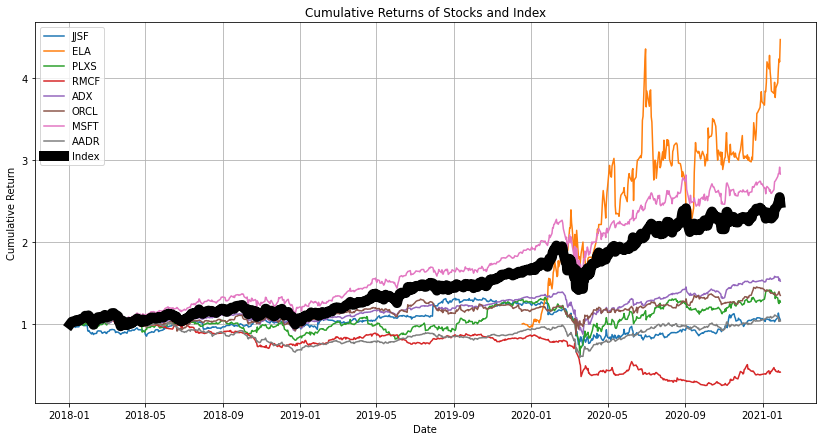

In [45]:
# Plotting the normalized cumulative returns of stocks
plt.figure(figsize=(14, 7))

# Plot each stock's cumulative returns
for column in cum_stock_returns_df.columns:
    plt.plot(cum_stock_returns_df.index, cum_stock_returns_df[column], label=column)

# Plot the cumulative returns of the index with an extra thick black line
plt.plot(cum_index_df.index, cum_index_df['Cumulative'], linestyle='-', linewidth=10, color='black', label='Index')

# Add titles and labels
plt.title('Cumulative Returns of Stocks and Index')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


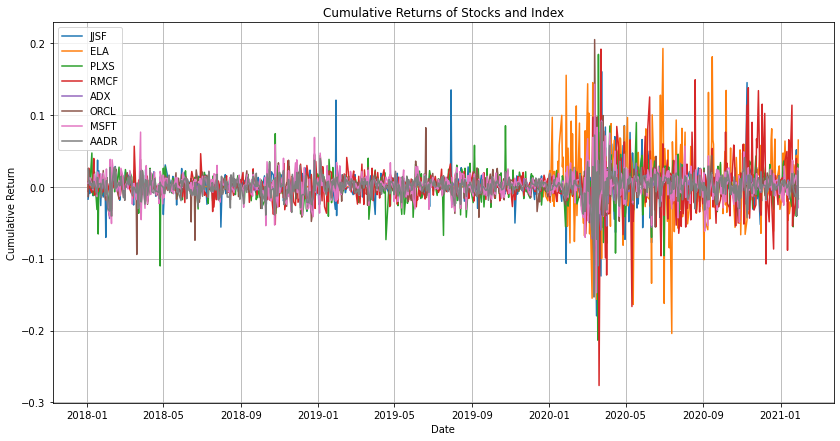

In [48]:
# Plotting the normalized cumulative returns of stocks
plt.figure(figsize=(14, 7))

# Plot each stock's cumulative returns
for column in cum_stock_returns_df.columns:
    plt.plot(cum_stock_returns_df.index, returns_df[column], label=column)

# Plot the cumulative returns of the index with an extra thick black line
# plt.plot(cum_index_df.index, cum_index_df['Cumulative'], linestyle='-', linewidth=10, color='black', label='Index')

# Add titles and labels
plt.title('Cumulative Returns of Stocks and Index')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [311]:
df.head()

,Date,Permno,Ticker,Returns
0,2018-01-02,10026,JJSF,-0.017454
1,2018-01-03,10026,JJSF,-0.009988
2,2018-01-04,10026,JJSF,0.013813
3,2018-01-05,10026,JJSF,-0.009551
4,2018-01-08,10026,JJSF,0.000742


In [227]:
ticker_dfs['JJSF']

ticker_df = ticker_dfs['AADR']
print(ticker_df)

            index  Permno   Returns     MarketCap
Date                                             
2018-01-02      0   10113  0.024639  4.088957e+06
2018-01-03      1   10113  0.010448  2.509528e+06
2018-01-04      2   10113  0.003775  5.928730e+06
2018-01-05      3   10113  0.007848  4.185541e+06
2018-01-08      4   10113  0.000000  3.676643e+06
...           ...     ...       ...           ...
2021-01-25    770   10113 -0.013262  1.837871e+05
2021-01-26    771   10113 -0.010730  7.625350e+05
2021-01-27    772   10113 -0.040135  3.715659e+05
2021-01-28    773   10113  0.021866  1.438222e+05
2021-01-29    774   10113 -0.017315  3.448501e+05

[775 rows x 4 columns]


In [45]:
#Read through available tickers (for now only 10, should be all)
#Keep in mind permno will not change over time (right?) so we can just read it from first row 

for ticker in current_list:
    globals()[f"df_{ticker}"] = ticker_df